In [1]:
import pandas as pd 
from pandas import DataFrame
from pandas import concat
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pyplot 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
from pandas import read_csv

# Load dataset by using Pandas library 
dataset = pd.read_csv(r"E:\PhD study\ELEG5491 Introduction to Deep Learning\bitcoin\datasets\bitcoinwithgoogleonly.csv", header=0, index_col=0)
print(dataset.head())
values = dataset.values

               Open     High      Low    Close      Volume  bitcoin  \
Date                                                                  
2014-10-20  389.231  390.084  378.252  382.845  16419000.0     1.74   
2014-10-21  382.421  392.646  380.834  386.475  14188900.0     2.04   
2014-10-22  386.118  388.576  382.249  383.158  11641300.0     1.71   
2014-10-23  382.962  385.048  356.447  358.417  26456900.0     1.80   
2014-10-24  358.591  364.345  353.305  358.345  15585700.0     1.98   

            blockchain  bitcoinrise  buy bitcoin  sell bitcoin  
Date                                                            
2014-10-20        1.50        11.18         0.42          0.00  
2014-10-21        2.37        11.18         1.47          1.34  
2014-10-22        2.04         7.31         1.29          0.00  
2014-10-23        1.11         3.87         0.42          0.00  
2014-10-24        2.37         7.74         1.59          0.00  


In [2]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# Here is created input columns which are (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# Here is created output/forecast column which are (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [3]:
# here checked values numeric format 
values = values.astype('float32')

# Dataset values are normalized by using MinMax method
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
#print(scaled)

# Normalized values are converted for supervised learning 
reframed = series_to_supervised(scaled,1,1)



In [4]:
# Dataset is splitted into two groups which are train and test sets
values = reframed.values 
train_size = int(len(values)*0.60)
validation_size = int(len(values)*0.80)
train = values[:train_size,:]
validation =values[train_size:validation_size,:]
test = values[validation_size:,:]

# Splitted datasets are splitted to trainX, trainY, testX and testY 
trainX, trainY = train[:,:-1], train[:,13]
validationX, validationY = validation[:,:-1], validation[:,13]
testX, testY = test[:,:-1], test[:,13]
print(trainY, trainY.shape)

# Train and Test datasets are reshaped in 3D size to be used in LSTM
trainX = trainX.reshape((trainX.shape[0],1,trainX.shape[1]))
validationX = validationX.reshape((validationX.shape[0],1,validationX.shape[1]))
testX = testX.reshape((testX.shape[0],1,testX.shape[1]))
print(trainX.shape, trainY.shape,testX.shape,testY.shape)

[0.0034123  0.00335798 0.00295282 ... 0.11233079 0.11488003 0.11618144] (1413,)
(1413, 1, 19) (1413,) (471, 1, 19) (471,)


In [5]:
# LSTM model is created and adjusted neuron structure
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.01))
model.add(Dense(1))
#model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Dataset is trained by using trainX and trainY
history = model.fit(trainX, trainY, epochs=30, batch_size=25, validation_data=(validationX, validationY), verbose=2, shuffle=False)


Epoch 1/30
57/57 - 0s - loss: 1.4175e-04 - val_loss: 9.5979e-04
Epoch 2/30
57/57 - 0s - loss: 5.1683e-04 - val_loss: 6.3418e-04
Epoch 3/30
57/57 - 0s - loss: 4.1262e-04 - val_loss: 6.9180e-04
Epoch 4/30
57/57 - 0s - loss: 8.8880e-04 - val_loss: 8.9123e-04
Epoch 5/30
57/57 - 0s - loss: 4.2145e-04 - val_loss: 0.0011
Epoch 6/30
57/57 - 0s - loss: 2.8953e-04 - val_loss: 2.9638e-04
Epoch 7/30
57/57 - 0s - loss: 1.9421e-04 - val_loss: 1.3869e-04
Epoch 8/30
57/57 - 0s - loss: 1.1911e-04 - val_loss: 1.1559e-04
Epoch 9/30
57/57 - 0s - loss: 9.0237e-05 - val_loss: 8.7551e-05
Epoch 10/30
57/57 - 0s - loss: 7.7649e-05 - val_loss: 6.4103e-05
Epoch 11/30
57/57 - 0s - loss: 6.5608e-05 - val_loss: 5.1993e-05
Epoch 12/30
57/57 - 0s - loss: 4.9678e-05 - val_loss: 3.3824e-05
Epoch 13/30
57/57 - 0s - loss: 4.0273e-05 - val_loss: 2.6082e-05
Epoch 14/30
57/57 - 0s - loss: 2.9600e-05 - val_loss: 1.8638e-05
Epoch 15/30
57/57 - 0s - loss: 2.4752e-05 - val_loss: 1.7113e-05
Epoch 16/30
57/57 - 0s - loss: 2.0933e

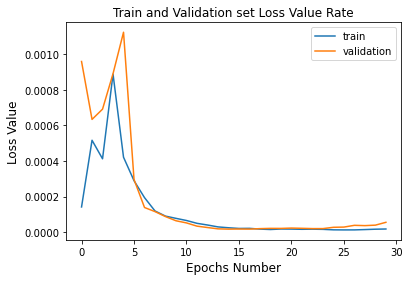

In [6]:
# Loss values are calculated for every training epoch and are visualized
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.title("Train and Validation set Loss Value Rate")
pyplot.xlabel('Epochs Number', fontsize=12)
pyplot.ylabel('Loss Value', fontsize=12)
pyplot.legend()
pyplot.show()


In [7]:
# Prediction process is performed for train dataset
trainPredict = model.predict(trainX)
trainX = trainX.reshape((trainX.shape[0], trainX.shape[2]))
print(trainX.shape)

validationPredict = model.predict(validationX)
validationX = validationX.reshape((validationX.shape[0], validationX.shape[2]))
print(validationX.shape)

# Prediction process is performed for test dataset
testPredict = model.predict(testX)
testX = testX.reshape((testX.shape[0], testX.shape[2]))
print(testX.shape)


(1413, 19)
(471, 19)
(471, 19)


In [8]:
# Trains dataset inverts scaling for training
trainPredict = concatenate((trainPredict, trainX[:, -9:]), axis=1)
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = trainPredict[:,0]

validationPredict = concatenate((validationPredict, validationX[:, -9:]), axis=1)
validationPredict = scaler.inverse_transform(validationPredict)
validationPredict = validationPredict[:,0]

# Test dataset inverts scaling for forecasting
testPredict = concatenate((testPredict, testX[:, -9:]), axis=1)
testPredict = scaler.inverse_transform(testPredict)
testPredict = testPredict[:,0]

In [9]:
# invert scaling for actual
trainY = trainY.reshape((len(trainY), 1))
inv_trainy = concatenate((trainY, trainX[:, -9:]), axis=1)
inv_trainy = scaler.inverse_transform(inv_trainy)
inv_trainy = inv_trainy[:,0]

validationY = validationY.reshape((len(validationY), 1))
inv_validationy = concatenate((validationY, validationX[:, -9:]), axis=1)
inv_validationy = scaler.inverse_transform(inv_validationy)
inv_validationy = inv_validationy[:,0]

testY = testY.reshape((len(testY), 1))
inv_testy = concatenate((testY, testX[:, -9:]), axis=1)
inv_testy = scaler.inverse_transform(inv_testy)
inv_testy = inv_testy[:,0]

In [10]:
#It should be noted that RMSE would be different each time run the code
#becasue of dropout layer.
# Performance measure calculated by using mean_squared_error for train and test prediction
rmset = sqrt(mean_squared_error(inv_trainy, trainPredict))
print('Train RMSE: %.3f' % rmset)
rmsev = sqrt(mean_squared_error(inv_validationy, validationPredict))
print('Validation RMSE: %.3f' % rmsev)
rmse = sqrt(mean_squared_error(inv_testy, testPredict))
print('Test RMSE: %.3f' % rmse)


Train RMSE: 386.528
Validation RMSE: 454.503
Test RMSE: 1140.703


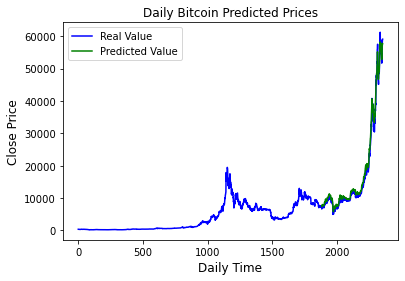

In [12]:
# Three parts of datasets are concatenated
final = np.append(trainPredict, validationPredict)
final = np.append(final, testPredict)
final = pd.DataFrame(data=final, columns=['Close'])
actual = dataset.Close
actual = actual.values
actual = pd.DataFrame(data=actual, columns=['Close'])

# Finally result are visualized
pyplot.plot(actual.Close, 'b', label='Real Value')
pyplot.plot(final.Close[1884:len(final)], 'g' , label='Predicted Value')
pyplot.title("Daily Bitcoin Predicted Prices")
pyplot.xlabel('Daily Time', fontsize=12)
pyplot.ylabel('Close Price', fontsize=12)
pyplot.legend(loc='best')
pyplot.show()